In [1]:
from importlib import reload
import models.utils; reload(models.utils)
from models.GAN import GAN
from models.utils import *
from models.models import *
%matplotlib inline

Using TensorFlow backend.


In [2]:
os.environ["CUDA_VISIBLE_DEVICES"] = '2'
limit_mem()

In [3]:
data_dir = '/home/ri27jiz/data/'
save_dir = './saved_models/'

In [4]:
# Load regular Radar model
gan1 = GAN()
gan1.load_data('radar', normalize=True, halve_radar=True,
               data_dir=data_dir)

Number of radar stamps: 5682
Train samples: 4546 Test samples: 1136


In [5]:
get_data

<function models.utils.get_data>

In [9]:
gan1.X_train.shape

(4546, 32, 32, 1)

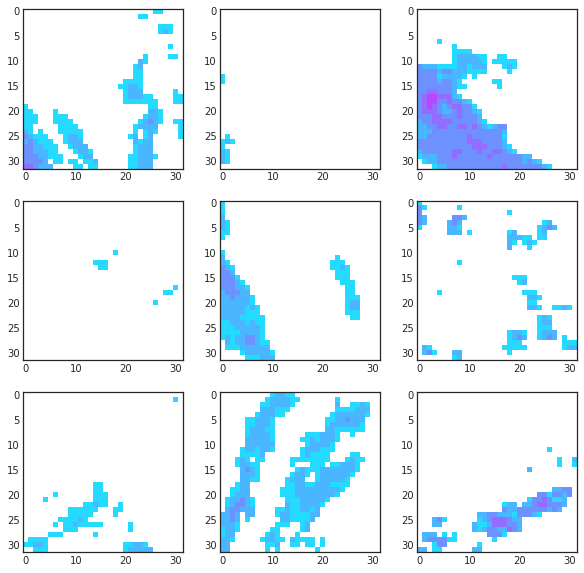

In [48]:
plot_stamps(gan1.X_train[np.random.randint(0, gan1.X_train.shape[0], 9), :, :, 0],
            normalize=True)

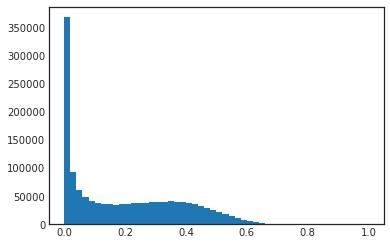

In [13]:
plt.hist(np.ravel(gan1.X_train), bins=50, range=(1e-4, 1));

In [32]:
from keras.utils.generic_utils import get_custom_objects
metrics_dict = dict([(f.__name__, f) for f in [wasserstein_loss]])
get_custom_objects().update(metrics_dict)

In [126]:
def plot_distribution(exp_id, data_dir='/home/ri27jiz/data/', noise_shape='uniform',
                      unnormalize=False, ylog=False):
    # load model and data
    gan = GAN()
    gan.load_data('radar', data_dir=data_dir, normalize=True, halve_radar=True)
    s = gan.model_dir + exp_id + '_'
    gan.G = keras.models.load_model(s + 'G.h5')
    gan.D = keras.models.load_model(s + 'D.h5')
    gan.compile()
    
    # Get some predictions
    true = np.squeeze(gan.X_train[:1000])
    preds = np.squeeze(gan.G.predict(create_noise(1000, 100, noise_shape)))
    if unnormalize:
        true = un_log_normalize(true)
        preds = un_log_normalize(preds)
    
    # Compute coverage fraction above 0.1 mm
    thresh = 0.1 if unnormalize else un_log_normalize(0.1)
    true_cf = (np.sum(true > thresh, axis=(1, 2)) / (true.shape[1]**2))
    preds_cf = (np.sum(preds > thresh, axis=(1, 2)) / (preds.shape[1]**2))
    
    # Plot figure
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    # Full distribution on the left
    mx = 50 if unnormalize else 1
    axes[0].hist(np.ravel(true), bins=50, range=(thresh, mx), label='true')
    axes[0].hist(np.ravel(preds), bins=50, range=(thresh, mx), label='preds', alpha=0.5)
    axes[0].set_title('Precipitation distribution')
    # Coverage fraction on the right
    axes[1].hist(true_cf, bins=50, range=(0, 1), label='true')
    axes[1].hist(preds_cf, bins=50, range=(0, 1), label='preds', alpha=0.5)
    axes[1].set_title('Coverage fraction distribution')
    if ylog: [axes[i].set_yscale('log') for i in range(2)]
    plt.tight_layout()
    plt.show()

Number of radar stamps: 5682
Train samples: 4546 Test samples: 1136


/home/ri27jiz/anaconda3/envs/cbrain_gpu/lib/python3.6/site-packages/keras/models.py:287: UserWarning: Error in loading the saved optimizer state. As a result, your model is starting with a freshly initialized optimizer.
  warnings.warn('Error in loading the saved optimizer '


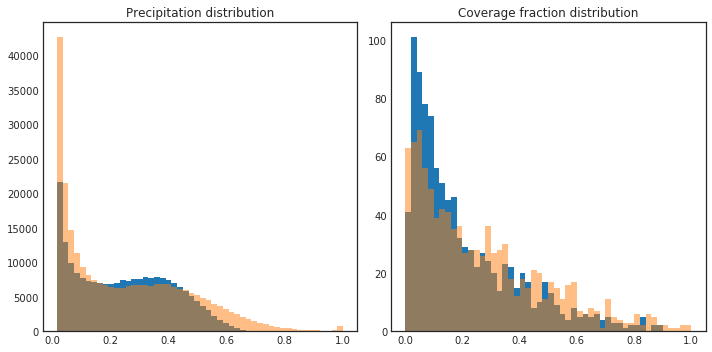

In [128]:
plot_distribution('radar2')

In [89]:
# Load model
s = gan1.model_dir + 'radar9' + '_'
gan1.G = keras.models.load_model(s + 'G.h5')
gan1.D = keras.models.load_model(s + 'D.h5')
gan1.compile()

/home/ri27jiz/anaconda3/envs/cbrain_gpu/lib/python3.6/site-packages/keras/models.py:287: UserWarning: Error in loading the saved optimizer state. As a result, your model is starting with a freshly initialized optimizer.
  warnings.warn('Error in loading the saved optimizer '


In [90]:
preds = gan1.G.predict(create_noise(1000, 100, 'uniform'))

In [94]:
un_log_normalize(0.1)

0.010517091807564771

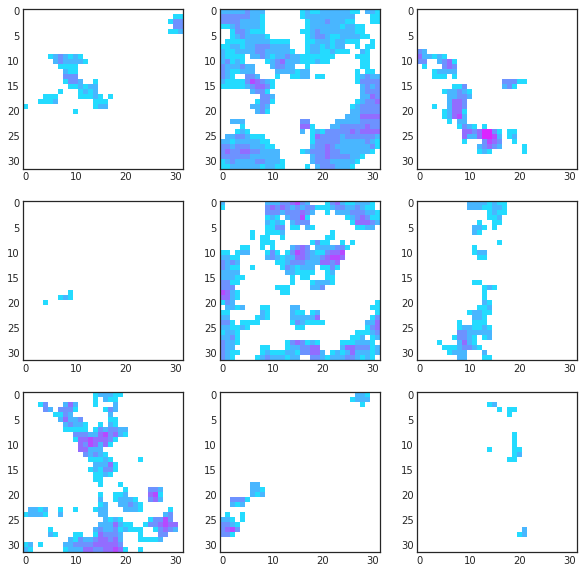

In [92]:
plot_stamps(preds[np.random.randint(0, preds.shape[0], 9), :, :, 0],
            normalize=True)

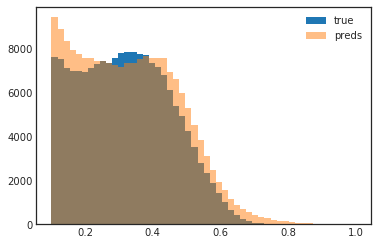

In [98]:
plt.hist(np.ravel(gan1.X_train[:1000]), bins=50, range=(1e-1, 1),
         label='true');
plt.hist(np.ravel(preds), bins=50, range=(1e-1, 1), alpha=0.5, 
        label='preds');
#plt.yscale('log')
plt.legend();

In [109]:
gan1.load_data('radar', halve_radar=True, data_dir=data_dir)

Number of radar stamps: 5682
Train samples: 4546 Test samples: 1136


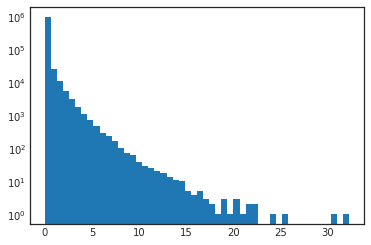

In [111]:
plt.hist(np.ravel(gan1.X_train[:1000]), bins=50);
plt.yscale('log')

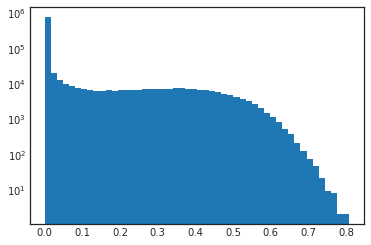

In [112]:
a = log_normalize(gan1.X_train[:1000])
plt.hist(np.ravel(a), bins=50);
plt.yscale('log')

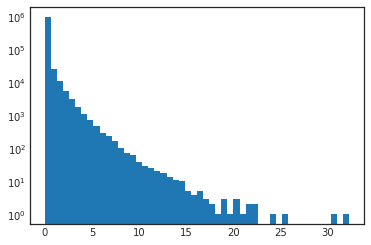

In [118]:
b = un_log_normalize(a)
plt.hist(np.ravel(b), bins=50);
plt.yscale('log')